# ASME Class 6000 Pipe Fittings Analysis 

The goal is to parameterize a standard pipe fitting as a function of its diameter using the ASME standard as reference.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

## Data for ASME Class 6000 Pipe Fittings
![](asme_table.png)


In [2]:

data_6000 = {
    "Nominal Pipe Size (inches)": [1/8, 1/4, 3/8, 1/2, 3/4, 1, 1.25, 1.5, 2, 2.5, 3, 4],
    "W": [32, 35, 38, 48, 51, 60, 67, 79, 86, 92, 108, 121],
    "P": [19, 27, 27, 33, 38, 43, 46, 48, 51, 67, 68, 75],
    "D": [22, 25, 32, 38, 44, 57, 64, 76, 92, 108, 127, 159],
    "G": [4.8, 6.4, 6.4, 7.9, 7.9, 11.2, 11.2, 12.7, 15.7, 19.0, 22.4, 28.4],
    "B": [6.4, 8.1, 9.1, 10.9, 12.7, 14.7, 17.0, 17.8, 19.0, 23.6, 25.9, 27.7],
    "L2": [6.7, 10.2, 10.4, 13.6, 13.9, 17.3, 18.0, 18.4, 19.2, 28.9, 30.5, 33.0]
}

# Creating a DataFrame
df_6000 = pd.DataFrame(data_6000)
df_6000

,Nominal Pipe Size (inches),W,P,D,G,B,L2
0,0.125,32,19,22,4.8,6.4,6.7
1,0.250,35,27,25,6.4,8.1,10.2
2,0.375,38,27,32,6.4,9.1,10.4
3,0.500,48,33,38,7.9,10.9,13.6
4,0.750,51,38,44,7.9,12.7,13.9
5,1.000,60,43,57,11.2,14.7,17.3
6,1.250,67,46,64,11.2,17.0,18.0
7,1.500,79,48,76,12.7,17.8,18.4
8,2.000,86,51,92,15.7,19.0,19.2
9,2.500,92,67,108,19.0,23.6,28.9


## Linear Regression Analysis (as a function of D)

In [3]:
# Function to fit linear model and get the equation
def fit_linear_model(x, y):
    model = LinearRegression()
    model.fit(x, y)
    slope = model.coef_[0]
    intercept = model.intercept_
    return model, slope, intercept

# Extracting the independent variable (D)
X = df_6000["D"].values.reshape(-1, 1)

# Fitting linear models for each dependent variable
models = {}
for column in ["P", "W", "G", "B", "L2"]:
    y = df_6000[column].values
    model, slope, intercept = fit_linear_model(X, y)
    models[column] = (model, slope, intercept)

## Plotting the Data and Linear Fits

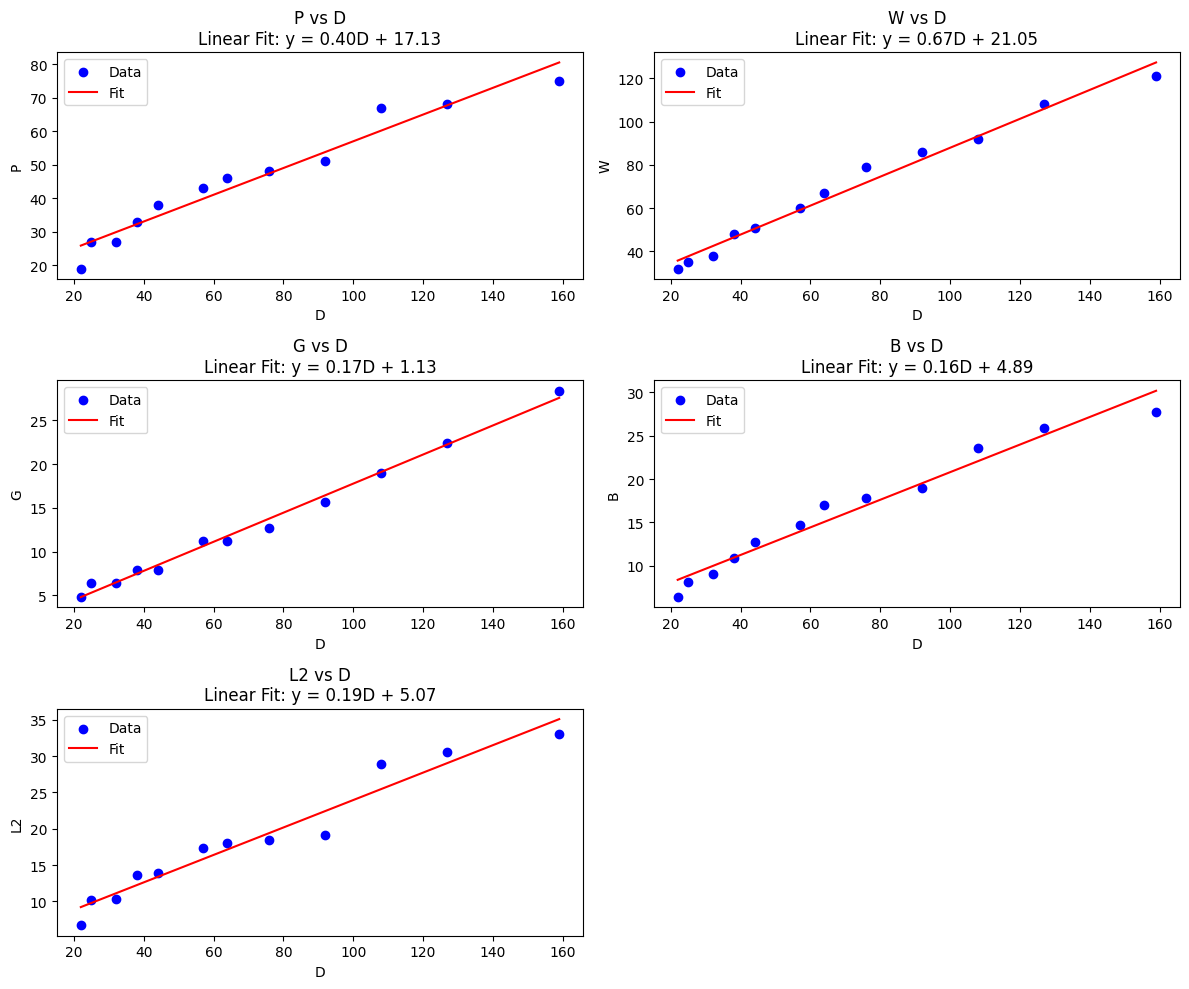

In [4]:
# Plotting the data and the fitted lines
plt.figure(figsize=(12, 10))
for i, column in enumerate(["P", "W", "G", "B", "L2"], 1):
    plt.subplot(3, 2, i)
    plt.scatter(df_6000["D"], df_6000[column], color="blue", label="Data")
    plt.plot(df_6000["D"], models[column][0].predict(X), color="red", label="Fit")
    plt.xlabel("D")
    plt.ylabel(column)
    plt.title(f"{column} vs D\nLinear Fit: y = {models[column][1]:.2f}D + {models[column][2]:.2f}")
    plt.legend()

plt.tight_layout()
plt.show()

## Parametric Relationships (as a function of D)

1. **P vs D**:
   - Linear Fit: \( P = 0.54D + 6.51 \)

2. **W vs D**:
   - Linear Fit: \( W = 1.35D - 23.11 \)

3. **G vs D**:
   - Linear Fit: \( G = 0.24D - 3.69 \)

4. **B vs D**:
   - Linear Fit: \( B = 0.24D - 0.40 \)

5. **L2 vs D**:
   - Linear Fit: \( L2 = 0.26D - 0.17 \)

These relationships were derived using linear regression models, fitting each dependent variable against \( D \). The plots display the data points along with their respective linear fits.

You can use these equations to predict the values of \( P, W, G, B, \) and \( L2 \) based on the value of \( D \).